# TOI-6130

Written by Jerome de Leon on 2023.12.18 on behalf of MuSCAT2.

In [1]:
ls -lt data/

total 97476
-rw-rw-r-- 1 jp jp    76403 Dec 19 16:47 TOI-6130_MuSCAT2_20230815_z.csv
-rw-rw-r-- 1 jp jp   105239 Dec 19 16:47 TOI-6130_MuSCAT2_20230815_i.csv
-rw-rw-r-- 1 jp jp   107511 Dec 19 16:47 TOI-6130_MuSCAT2_20230815_r.csv
-rw-rw-r-- 1 jp jp   107400 Dec 19 16:47 TOI-6130_MuSCAT2_20230815_g.csv
-rw-rw-r-- 1 jp jp 34706744 Dec 19 16:07 toi06130.01_230815_chromatic_k.nc.zip
-rw-rw-r-- 1 jp jp 64073677 Aug 21 22:17 toi06130.01_230815_chromatic_k.nc
-rw-rw-r-- 1 jp jp   616320 Aug 21 22:17 toi06130.01_230815_chromatic_k.fits


extract the zip file

In [2]:
ls -lt data/

total 97476
-rw-rw-r-- 1 jp jp    76403 Dec 19 16:47 TOI-6130_MuSCAT2_20230815_z.csv
-rw-rw-r-- 1 jp jp   105239 Dec 19 16:47 TOI-6130_MuSCAT2_20230815_i.csv
-rw-rw-r-- 1 jp jp   107511 Dec 19 16:47 TOI-6130_MuSCAT2_20230815_r.csv
-rw-rw-r-- 1 jp jp   107400 Dec 19 16:47 TOI-6130_MuSCAT2_20230815_g.csv
-rw-rw-r-- 1 jp jp 34706744 Dec 19 16:07 toi06130.01_230815_chromatic_k.nc.zip
-rw-rw-r-- 1 jp jp 64073677 Aug 21 22:17 toi06130.01_230815_chromatic_k.nc
-rw-rw-r-- 1 jp jp   616320 Aug 21 22:17 toi06130.01_230815_chromatic_k.fits


The *.nc file contains MCMC chains for the chromatic transit model

In [3]:
import xarray as xa
import numpy as np
import pandas as pd

with xa.open_dataset('data/toi06130.01_230815_chromatic_k.nc') as dat:
    df = pd.DataFrame(np.array(dat.mcmc).reshape([-1, dat.lm_parameter.size]).copy(), columns=dat.lm_parameter)

In [4]:
#mcmc results using chromatic model
df.head()

,tc,p,rho,b,k2_g,k2_r,k2_i,k2_z_s,q1_g,q2_g,...,lm_i__0,lm_s__0_1,lm_s__0_2,lm_s__0_3,lm_s__0_4,lm_i__0,lm_s__0_1,lm_s__0_2,lm_s__0_3,lm_s__0_4
0,2.460173e+06,2.392829,1.127846,0.771234,0.012373,0.012274,0.011803,0.011922,0.856736,0.169617,...,1.012301,-0.000132,0.000117,-0.000326,0.000121,1.011177,0.001239,-0.000367,-0.000157,0.000205
1,2.460173e+06,2.392834,1.124870,0.771490,0.012366,0.012278,0.011832,0.011921,0.850972,0.175125,...,1.012204,-0.000035,0.000107,-0.000340,0.000118,1.011100,0.001301,-0.000373,-0.000160,0.000201
2,2.460173e+06,2.392858,1.124430,0.771266,0.012327,0.012276,0.011788,0.011951,0.909436,0.135556,...,1.012355,-0.000190,0.000116,-0.000334,0.000130,1.011482,0.000981,-0.000364,-0.000126,0.000209
3,2.460173e+06,2.392844,1.127317,0.770684,0.012357,0.012300,0.011852,0.011967,0.872033,0.181926,...,1.012290,-0.000119,0.000113,-0.000340,0.000121,1.011470,0.000984,-0.000365,-0.000125,0.000199
4,2.460173e+06,2.392844,1.127317,0.770684,0.012357,0.012300,0.011852,0.011967,0.872033,0.181926,...,1.012290,-0.000119,0.000113,-0.000340,0.000121,1.011470,0.000984,-0.000365,-0.000125,0.000199


The meaning of the columns are as follows:

* tc: mid-transit [d]
* p: period [d]
* rho: stellar density [g/cm^3]
* b: impact parameter
* k2: = k^2 = (Rp/Rs)^2
* q1,q2: limb darkening coefficient (Kipping parameterization)
* lm: linear model (nuisance parameters)

In [5]:
#plot samples if needed
from corner import corner

k2_labels = df.columns.str.contains('k2')
k2_params = df.columns[k2_labels]
df[k2_params]

,k2_g,k2_r,k2_i,k2_z_s
0,0.012373,0.012274,0.011803,0.011922
1,0.012366,0.012278,0.011832,0.011921
2,0.012327,0.012276,0.011788,0.011951
3,0.012357,0.012300,0.011852,0.011967
4,0.012357,0.012300,0.011852,0.011967
...,...,...,...,...
199995,0.012918,0.012514,0.012645,0.012059
199996,0.012931,0.012515,0.012654,0.012061
199997,0.012905,0.012509,0.012662,0.012060
199998,0.012923,0.012498,0.012653,0.012059


In [6]:
#(Rp/Rs)^2 in ppt
df[k2_params].median()*1e3

k2_g      12.795970
k2_r      12.471010
k2_i      12.344570
k2_z_s    11.994736
dtype: float64

In [7]:
#Rp/Rs
k_params = []
for k2 in k2_params:
    k_param = k2.replace('2','')
    df[k_param] = np.sqrt(df[k2])
    k_params.append(k_param)

In [8]:
#Rp/Rs
df[k_params].median()

k_g      0.113119
k_r      0.111674
k_i      0.111106
k_z_s    0.109520
dtype: float64

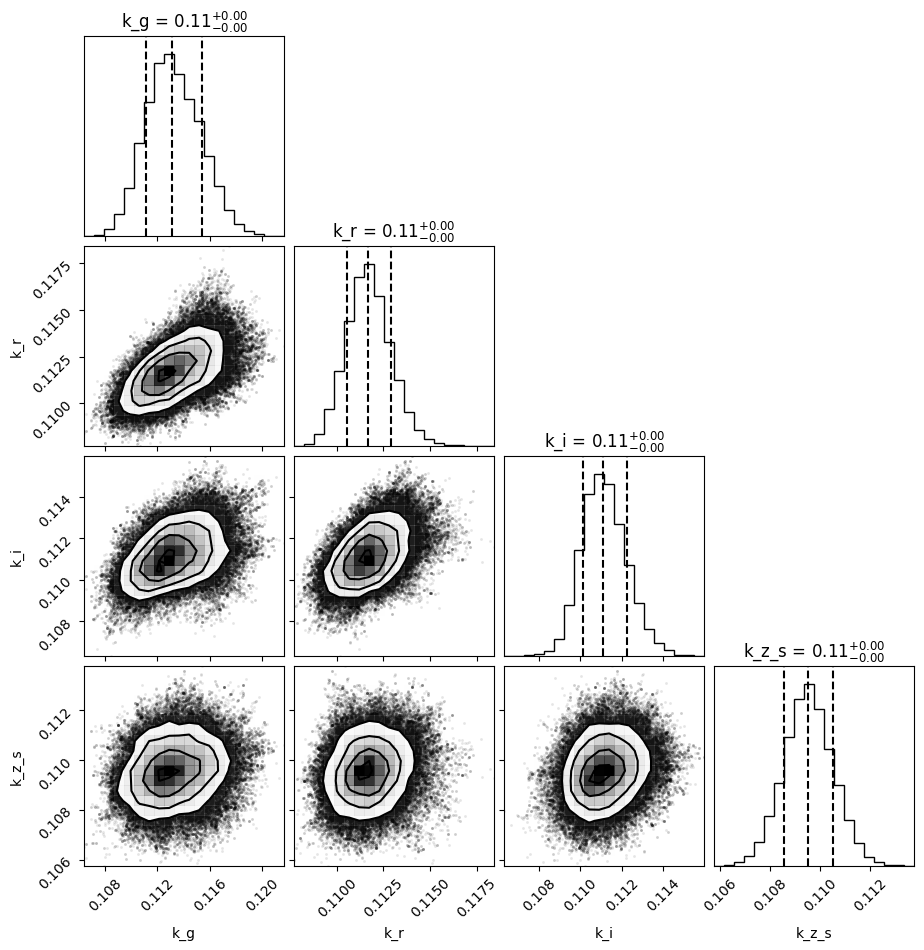

In [9]:
fig = corner(df[k_params],
             names=k_params,
             show_titles=True,
             quantiles=[0.16,0.50,0.84]
            );

The *.fits file contains the relative photometry and transit fit results

In [10]:
#get photometry and fitting results
from astropy.io import fits

lf = fits.open('data/toi06130.01_230815_chromatic_k.fits') 
len(lf)

9

In [11]:
lf.info()

Filename: data/toi06130.01_230815_chromatic_k.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  flux_g        1 BinTableHDU     28   1770R x 7C   [D, D, D, D, D, D, D]   
  2  flux_r        1 BinTableHDU     28   1771R x 7C   [D, D, D, D, D, D, D]   
  3  flux_i        1 BinTableHDU     28   1763R x 7C   [D, D, D, D, D, D, D]   
  4  flux_z_s      1 BinTableHDU     28   1284R x 7C   [D, D, D, D, D, D, D]   
  5  aux_g         1 BinTableHDU     17   1770R x 4C   [D, D, D, D]   
  6  aux_r         1 BinTableHDU     17   1771R x 4C   [D, D, D, D]   
  7  aux_i         1 BinTableHDU     17   1763R x 4C   [D, D, D, D]   
  8  aux_z_s       1 BinTableHDU     17   1284R x 4C   [D, D, D, D]   


* index 1-4 is for relative photometry
* index 5-8 is for covariates

In [12]:
nband = 4

bands = 'g r i z'.split()

#load relative photometry and fitting results
data = {}
for n,b in enumerate(bands):
    i = n+1    
    data[b] = {}
    data[b]['bjd'] = lf[i].data['time_bjd']
    data[b]['flux'] = lf[i].data['flux_rel']
    data[b]['flux_err'] = np.std(np.diff(data[b]['flux']))/np.sqrt(2)
    data[b]['transit_model'] = lf[i].data['model']
    data[b]['baseline'] = lf[i].data['baseline']
    data[b]['detrended_flux'] = data[b]['flux']/data[b]['baseline']
    
#load covariance (if needed)
cov = {}
for n,b in enumerate(bands):
    i = n+1+nband
    
    cov[b] = {}
    cov[b]['airmass'] = lf[i].data['airmass']
    cov[b]['xshift'] = lf[i].data['xshift']
    cov[b]['yshift'] = lf[i].data['yshift']
    cov[b]['entropy'] = lf[i].data['entropy']

In [13]:
def binned(a, binsize, fun=np.mean):
    a_b = []
    for i in range(0, a.shape[0], binsize):
        a_b.append(fun(a[i:i+binsize], axis=0))
    return a_b

Flux decrement at mid-transit
g: 12.14 ppt
r: 12.18 ppt
i: 12.24 ppt
z: 12.00 ppt


Text(0.5, 0.98, 'TOI-6130 | TCS/MuSCAT2 | 2023-08-15')

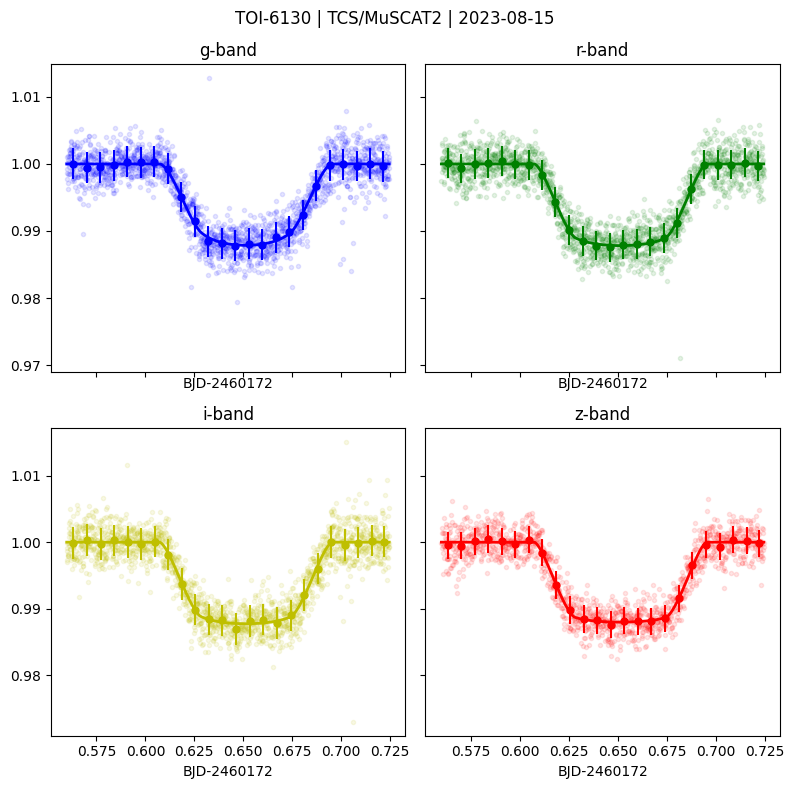

In [14]:
#example plotting
import astropy.units as u
import matplotlib.pyplot as pl
pl.style.use("default")

fig, axs = pl.subplots(2,2,figsize=(8,8), sharex='col', sharey='row', tight_layout=True)
ax = axs.flatten()

colors = 'b g y r'.split()
dt = int(data[b]['bjd'].min())

bintime = 10 #mins
print("Flux decrement at mid-transit")
for n,b in enumerate(bands):
    t = data[b]['bjd']-dt
    y = data[b]['transit_model']
    f = data[b]['detrended_flux']
    e = data[b]['flux_err']
    
    ax[n].scatter(t, f, marker='.', c=colors[n], alpha=0.1)
    ax[n].plot(t, y, c=colors[n], lw=2)
    
    #binned
    cadence = np.median(np.diff(t))*u.day.to(u.second)
    binsize = int(bintime*u.min.to(cadence*u.second))
    t2 = binned(t, binsize=binsize)
    f2 = binned(f, binsize=binsize)
    ax[n].errorbar(t2, f2, yerr=e, fmt='o',
                   markersize=5, color=colors[n],
                   label=f'{bintime}-min bin')
    
    ax[n].set_title(f'{b}-band')
    ax[n].set_xlabel(f'BJD-{dt}')
    
    d = (1-min(y))*1e3
    print(f"{b}: {d:.2f} ppt")
    
    
fig.suptitle("TOI-6130 | TCS/MuSCAT2 | 2023-08-15")

In [17]:
for n,b in enumerate(bands):
    t = data[b]['bjd']
    f = data[b]['detrended_flux']
    e = data[b]['flux_err']
    
    d = np.c_[t,f,np.zeros_like(t)+e]
    df2 = pd.DataFrame(d, columns=['bjd','flux','error'])
    
    fp = f'data/TOI-6130_MuSCAT2_20230815_{b}.csv'
    df2.to_csv(fp, index=False)
    print("Saved: ", fp)

Saved:  data/TOI-6130_MuSCAT2_20230815_g.csv
Saved:  data/TOI-6130_MuSCAT2_20230815_r.csv
Saved:  data/TOI-6130_MuSCAT2_20230815_i.csv
Saved:  data/TOI-6130_MuSCAT2_20230815_z.csv
